In [68]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import sys
from sklearn.model_selection import train_test_split

In [69]:
sys.path.append('/home/alessia/Tirocinio/Fuzzy-C')

In [70]:
from FCM import *

# Setosa

In [94]:
dataset=pd.read_csv("Dataset/iris-setosa.csv")
X = dataset[["sepal_length", "sepal_width"]].values
y = dataset["species"].values
#print("features:\n", X, "\nLabels:\n ", y)

In [95]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)
#print(iris_values_2d)

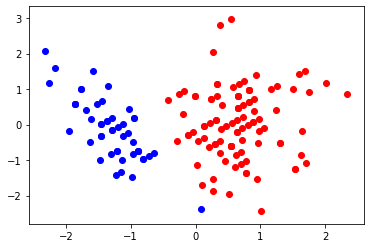

In [96]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip((1, 0),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [109]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    #print(Y)
    zs = np.array([estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))), 2, centers, 2)
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    zs1 = []
    zs2 = []
    for i in range(0, len(zs)):
        zs1.append(zs[i][0][0])
        zs2.append(zs[i][0][1])
    Z = np.array(zs1).reshape(X.shape)
    
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.1, .3, .5, .55, .6, .78, .95), colors='k')
    #print(membership_contour)
    plt.clabel(membership_contour, inline=1)

In [98]:
def generator(m):
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

In [99]:
xTrain, xTest, yTrain, yTest = train_test_split(iris_values_2d,y, test_size=80)
model = FCM()

train_membership, centers = model.fuzzy_train(xTrain , 2 , 2)

[0.63480198 0.36519802]
[[0.63480198 0.63558731 0.63632418 ... 0.44141991 0.4402834  0.43923765]
 [0.63722908 0.63809584 0.63891537 ... 0.4388807  0.43777744 0.43676719]
 [0.63969032 0.64064304 0.64155008 ... 0.43624752 0.43518234 0.4342123 ]
 ...
 [0.56934356 0.56844506 0.56744964 ... 0.35483922 0.35586173 0.35692813]
 [0.56668276 0.56573724 0.56469665 ... 0.35753925 0.3584675  0.3594416 ]
 [0.56410756 0.56312013 0.56203965 ... 0.36019777 0.36103685 0.36192338]]


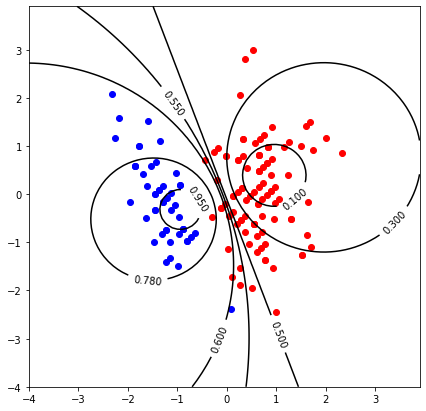

In [110]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(model.fuzzy_predict)
plt.show()

In [120]:

#gr_dataset()
x = np.arange(-4, 4, .1)
y = np.arange(-4, 4, .1)
X, Y = np.meshgrid(x, y)
#print(Y)
zs = np.array([model.fuzzy_predict(np.array(list(zip(np.ravel(x), np.ravel(y)))), 2, centers, 2)
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
zs1 = []
zs2 = []
for i in range(0, len(zs)):
    zs1.append(zs[i][0][0])
    zs2.append(zs[i][0][1])
Z = np.array(zs1).reshape(X.shape)

normalized = (Z-Z.min())/(Z.max()-Z.min())
#gr_membership_contour(clf.predict)

#plt.show()

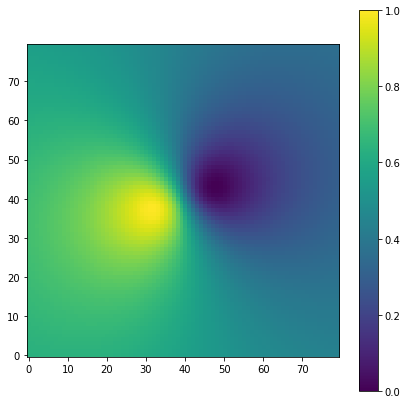

In [124]:
plt.figure(figsize=(7,7))
plt.imshow(normalized)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

# Versicolor

In [60]:
dataset=pd.read_csv("iris-versicolor.csv")
X = dataset[["sepal_length", "sepal_width"]].values
y = dataset["species"].values
#print("features:\n", X, "\nLabels:\n ", y)

In [59]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)
#print(iris_values_2d)

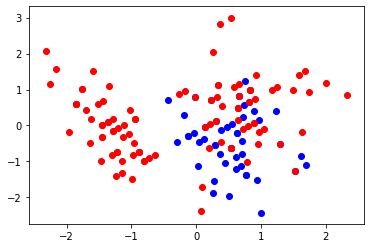

In [61]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip((1, 0),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

[[0.61600828 0.61603259 0.61598111 ... 0.39382261 0.39354761 0.39335282]
 [0.61879031 0.61888711 0.61890796 ... 0.39091206 0.39070329 0.39057528]
 [0.62163447 0.6218091  0.62190792 ... 0.38792286 0.38778593 0.38773002]
 ...
 [0.610386   0.61026465 0.61006108 ... 0.3800649  0.38012973 0.38026914]
 [0.60756949 0.60737962 0.60710805 ... 0.38300041 0.38299095 0.38305607]
 [0.60482206 0.60456889 0.60423479 ... 0.3858639  0.38578554 0.38578152]]


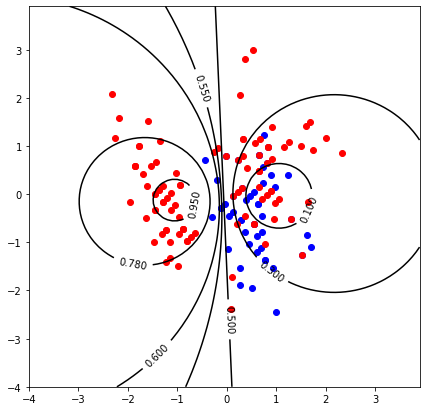

In [62]:
xTrain, xTest, yTrain, yTest = train_test_split(iris_values_2d,y, test_size=80)
model = FCM()

train_membership, centers = model.fuzzy_train(xTrain , 2 , 2)
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(model.fuzzy_predict)
plt.show()


# Virginica

In [68]:
dataset=pd.read_csv("iris-virginica.csv")
X = dataset[["petal_length", "petal_width"]].values
y = dataset["species"].values
#print("features:\n", X, "\nLabels:\n ", y)

In [69]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)
#print(iris_values_2d)

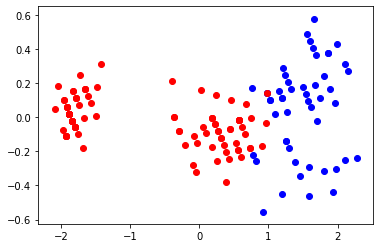

In [70]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip((1, 0),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

[[0.64913604 0.64834738 0.64741984 ... 0.33937604 0.33941358 0.33953924]
 [0.65317819 0.65246733 0.65161474 ... 0.33570235 0.33582932 0.33604418]
 [0.65733022 0.65670465 0.65593474 ... 0.33195422 0.33217655 0.33248622]
 ...
 [0.67068022 0.67038509 0.66995008 ... 0.33884716 0.3389003  0.33904646]
 [0.66646192 0.66606939 0.66553889 ... 0.34267535 0.34263359 0.34268525]
 [0.66234632 0.66186417 0.66124626 ... 0.34642312 0.34629264 0.34625563]]


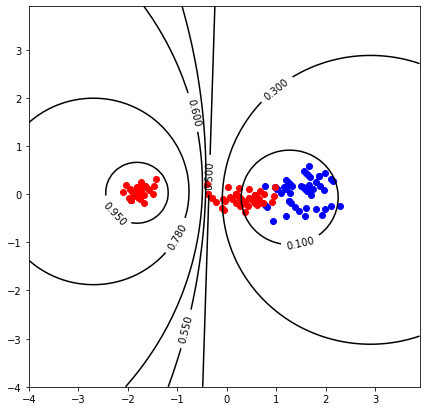

In [71]:
xTrain, xTest, yTrain, yTest = train_test_split(iris_values_2d,y, test_size=80)
model = FCM()

train_membership, centers = model.fuzzy_train(xTrain , 2 , 2)
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(model.fuzzy_predict)
plt.show()
